<a href="https://colab.research.google.com/github/kumarnihal26/Inventory-Management-Analysis/blob/main/Inventory_Management_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()  # choose your downloaded CSV


Saving retail_store_inventory.csv to retail_store_inventory.csv


In [4]:
import pandas as pd

df = pd.read_csv("retail_store_inventory.csv")  # replace with your CSV name
df.head()
#df.info()


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [10]:
# Missing values
print(df.isnull().sum())

# Duplicates
print("Duplicates:", df.duplicated().sum())

# Negative Inventory or Units Sold/Ordered
df[(df['Inventory Level'] < 0) | (df['Units Sold'] < 0) | (df['Units Ordered'] < 0)]


Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64
Duplicates: 0


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality


In [11]:
total_sold = df.groupby('Product ID')['Units Sold'].sum().sort_values(ascending=False)
print(total_sold)



Product ID
P0016    508472
P0020    507708
P0014    507622
P0015    507283
P0005    503648
P0009    502086
P0013    500619
P0017    500510
P0011    499362
P0007    499321
P0001    498061
P0019    497899
P0006    497131
P0010    496469
P0004    495501
P0003    493279
P0018    492551
P0012    491670
P0008    488563
P0002    487827
Name: Units Sold, dtype: int64


In [12]:
avg_inventory = df.groupby('Product ID')['Inventory Level'].mean()
print(avg_inventory)


Product ID
P0001    272.993981
P0002    271.146101
P0003    274.932695
P0004    271.556498
P0005    273.041860
P0006    273.571272
P0007    274.713269
P0008    272.774829
P0009    275.324761
P0010    274.922572
P0011    272.807661
P0012    272.511902
P0013    275.111354
P0014    277.892202
P0015    276.408208
P0016    277.505062
P0017    278.320930
P0018    272.538714
P0019    274.525308
P0020    276.798358
Name: Inventory Level, dtype: float64


In [13]:
total_demand = df.groupby('Category')['Units Sold'].sum()
print(total_demand)


Category
Clothing       1999166
Electronics    1960432
Furniture      2025017
Groceries      2000482
Toys           1990485
Name: Units Sold, dtype: int64


In [14]:
out_of_stock = df[df['Inventory Level'] == 0].groupby('Product ID').size()
print(out_of_stock)


Series([], dtype: int64)


In [15]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate daily units sold per product
daily_sales = df.groupby(['Date','Product ID'])['Units Sold'].sum().unstack().fillna(0)

# 7-day Moving Average Forecast
forecast = daily_sales.rolling(window=7).mean()
forecast.tail()


Product ID,P0001,P0002,P0003,P0004,P0005,P0006,P0007,P0008,P0009,P0010,P0011,P0012,P0013,P0014,P0015,P0016,P0017,P0018,P0019,P0020
Date,,,,,,,,,,,,,,,,,,,,
2023-12-28,769.000000,870.000000,790.571429,699.714286,606.000000,713.571429,798.428571,824.285714,678.714286,605.857143,663.571429,702.142857,674.285714,734.857143,591.142857,732.428571,682.857143,476.857143,767.285714,729.714286
2023-12-29,709.714286,895.000000,782.000000,690.142857,683.571429,690.142857,787.142857,772.714286,701.285714,602.714286,651.000000,674.571429,690.285714,779.000000,555.428571,657.714286,682.428571,496.857143,789.714286,710.142857
2023-12-30,682.000000,852.857143,728.428571,645.714286,791.142857,644.000000,785.857143,838.285714,719.714286,601.714286,601.285714,747.000000,735.428571,729.857143,519.857143,695.857143,702.714286,533.428571,749.142857,671.714286
2023-12-31,606.428571,819.142857,744.000000,685.142857,817.285714,739.571429,784.285714,724.142857,705.571429,600.285714,651.142857,617.857143,723.428571,641.714286,524.857143,644.428571,779.000000,492.571429,710.857143,646.428571
2024-01-01,660.285714,819.428571,653.571429,641.285714,881.714286,792.000000,738.142857,785.000000,690.857143,641.714286,632.285714,631.571429,755.000000,696.142857,543.571429,561.571429,671.714286,505.857143,757.857143,673.000000


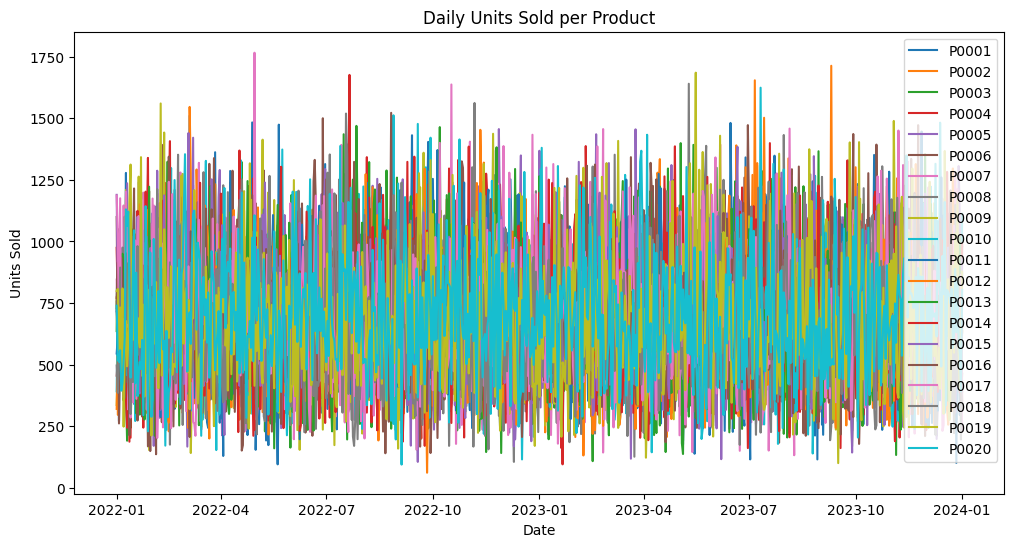

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for product in daily_sales.columns:
    plt.plot(daily_sales.index, daily_sales[product], label=product)
plt.title('Daily Units Sold per Product')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()


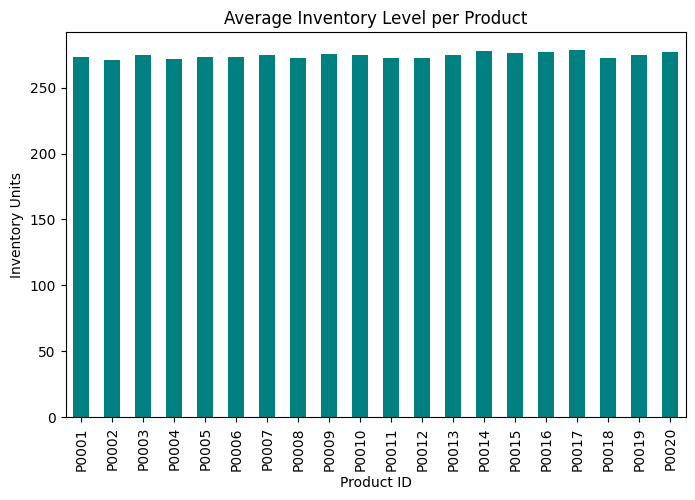

In [17]:
avg_inventory.plot(kind='bar', color='teal', figsize=(8,5))
plt.title('Average Inventory Level per Product')
plt.ylabel('Inventory Units')
plt.show()


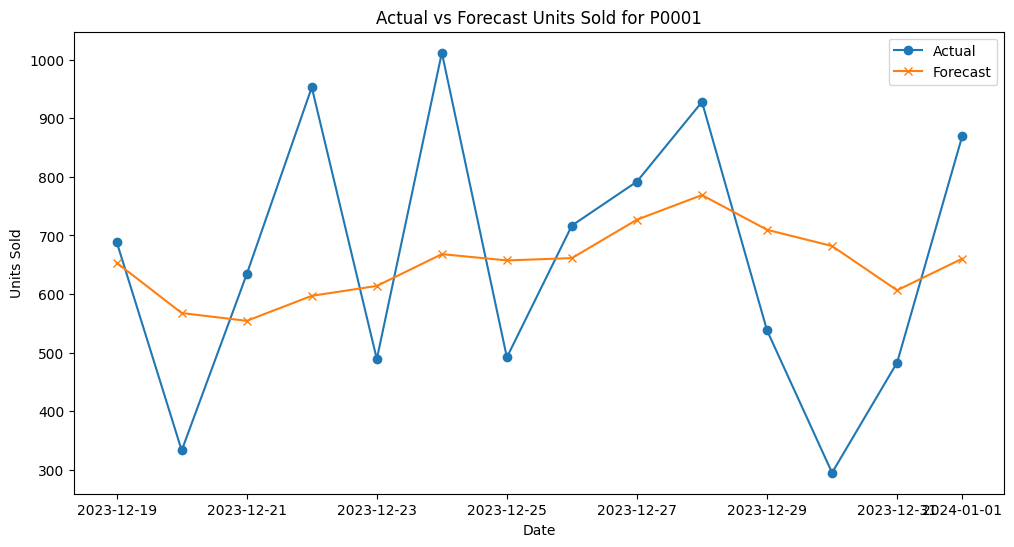

In [18]:
# Compare last 14 days actual vs forecast
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))
product = daily_sales.columns[0]  # first product
plt.plot(daily_sales.index[-14:], daily_sales[product].iloc[-14:], marker='o', label='Actual')
plt.plot(forecast.index[-14:], forecast[product].iloc[-14:], marker='x', label='Forecast')
plt.title(f'Actual vs Forecast Units Sold for {product}')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()
